<a href="https://colab.research.google.com/github/Namrata-Paul/Supervised-Learning-techniques/blob/main/SVM_digit_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 'columns'), df.target, test_size=0.2, random_state=10)

In [8]:
from sklearn.svm import SVC
model = SVC()

In [9]:
model.fit(X_train, y_train)

SVC()

In [10]:
y_predicted = model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]])

Text(69.0, 0.5, 'Truth')

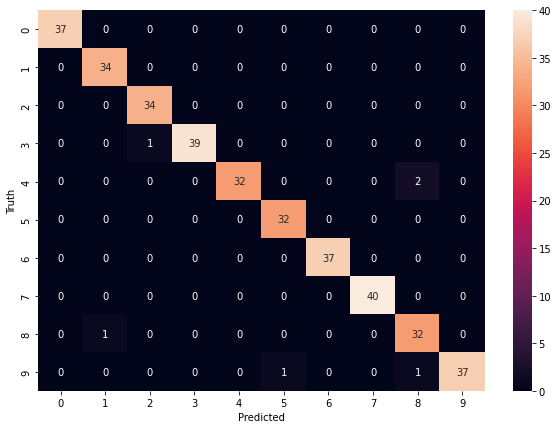

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
model.score(X_test, y_test)

0.9833333333333333

Tune Parameters

1. Kernel

In [14]:
l_model = SVC(kernel = 'linear')

In [15]:
l_model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
l_model.score(X_test, y_test)

0.975

In [17]:
r_model = SVC(kernel = 'rbf')

In [18]:
r_model.fit(X_train, y_train)

SVC()

In [19]:
r_model.score(X_test, y_test)

0.9833333333333333

2. Regularization (C)

In [20]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9833333333333333

In [21]:
model_c = SVC(C=10)
model_c.fit(X_train, y_train)
model_c.score(X_test, y_test)

0.9861111111111112

3. Gamma

In [22]:
model_g = SVC(gamma='scale')
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9833333333333333

In [23]:
model_g = SVC(gamma='auto')
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.40555555555555556